In [2]:
import numpy as np
import pandas as pd

In [3]:
from sklearn.datasets import load_iris
data = load_iris()

In [4]:
X = data.data
Y = data.target

In [5]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size=0.2 , random_state=42)

In [6]:
X_train.shape , Y_train.shape

((120, 4), (120,))

In [7]:
X_test.shape , Y_test.shape

((30, 4), (30,))

In [8]:
Y_train

array([0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2,
       1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2,
       1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1,
       0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2,
       1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2,
       1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

In [9]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class='ovr' , solver='liblinear')
lr.fit(X_train,Y_train)

c:\Users\gaurav gupta\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='ovr', solver='liblinear')

In [10]:
lr.coef_ , lr.intercept_

(array([[ 0.3711229 ,  1.409712  , -2.15210117, -0.95474179],
        [ 0.49400451, -1.58897112,  0.43717015, -1.11187838],
        [-1.55895271, -1.58893375,  2.39874554,  2.15556209]]),
 array([ 0.2478905 ,  0.86408083, -1.00411267]))

In [11]:
Y_pred = lr.predict(X_test)


In [12]:
from sklearn.metrics import accuracy_score , r2_score
accuracy_score(Y_pred , Y_test)


1.0

In [13]:
df = pd.DataFrame(data.data , columns=data.feature_names)
df["target"] = data.target

In [14]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


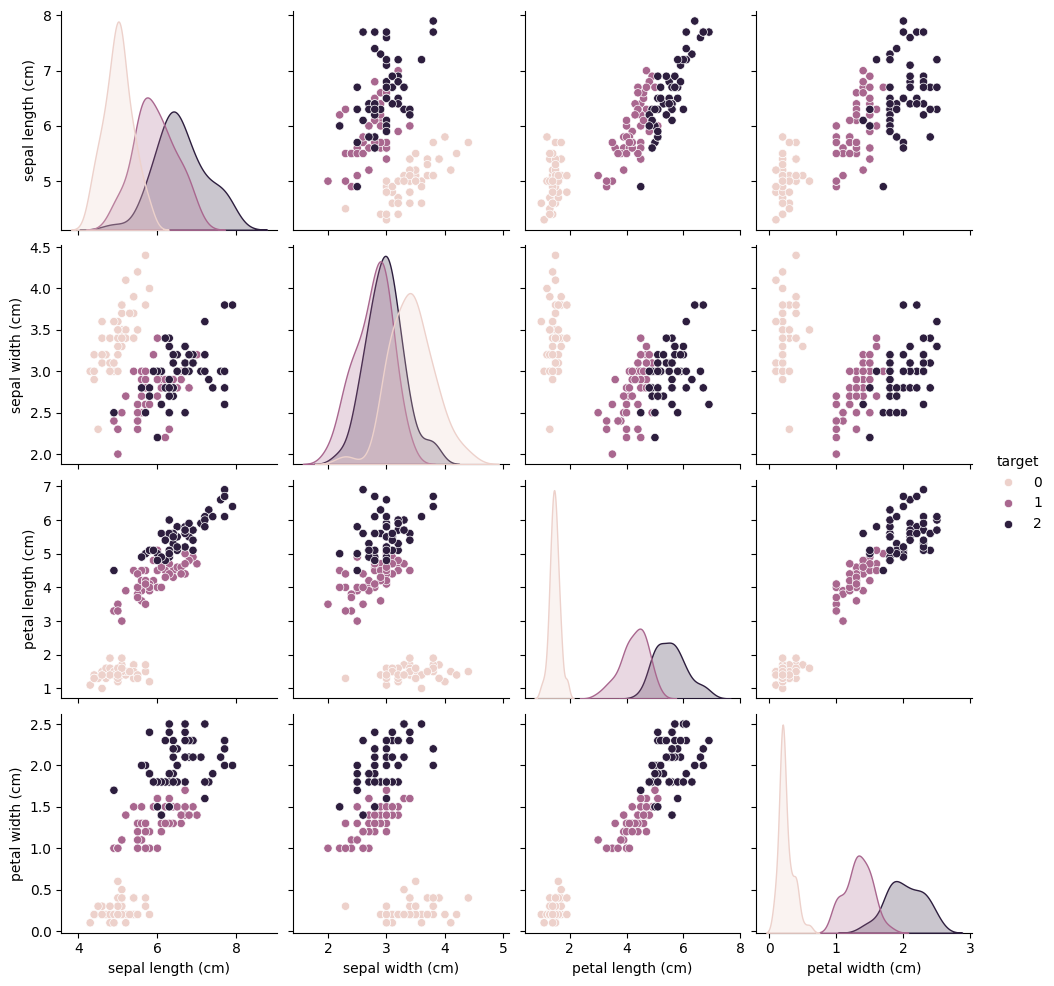

In [15]:
import seaborn as sns
sns.pairplot(df , hue='target')

In [16]:
new_df = df[df['target'] != 0][['sepal length (cm)' , 'sepal width (cm)' , 'target']]

In [17]:
new_df.head()

,sepal length (cm),sepal width (cm),target
50,7.0,3.2,1
51,6.4,3.2,1
52,6.9,3.1,1
53,5.5,2.3,1
54,6.5,2.8,1


In [18]:
new_df.target.values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [20]:
X = df.iloc[:,0:2]
Y = df.iloc[:,-1]

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [25]:
clf1 = LogisticRegression()
clf2 = KNeighborsClassifier()
clf3 = RandomForestClassifier()

In [26]:
estimators = [('lr' , clf1) , ('knn' , clf2) , ('rf' , clf3)]

In [27]:
for estimator in estimators:
    x = cross_val_score(estimator[1] , X , Y , cv=10 , scoring='accuracy')
    print(estimator[0] , np.round(np.mean(x) , 2))

lr 0.81
knn 0.76
rf 0.72


In [28]:
from sklearn.ensemble import VotingClassifier


<p> Hard Voting</p>

In [31]:
vc = VotingClassifier(estimators=estimators , voting='hard')
np.mean(cross_val_score(vc , X , Y , cv=10 , scoring='accuracy'))

np.float64(0.7733333333333334)

<p>Soft voting</p>

In [32]:
vc = VotingClassifier(estimators=estimators , voting='soft')
np.mean(cross_val_score(vc , X , Y , cv=10 , scoring='accuracy'))

np.float64(0.76)

<p>Weighted voting</p>

In [33]:
for i in range(1,4):
    for j in range(1,4):
        for k in range(1,4):
            vc = VotingClassifier(estimators=estimators , voting='soft' , weights=[i,j,k])
            print(i , j , k , np.mean(cross_val_score(vc , X , Y , cv=10 , scoring='accuracy')))

1 1 1 0.7666666666666666
1 1 2 0.7533333333333333
1 1 3 0.74
1 2 1 0.7666666666666666
1 2 2 0.7666666666666666
1 2 3 0.76
1 3 1 0.7666666666666666
1 3 2 0.7533333333333333
1 3 3 0.7466666666666667
2 1 1 0.7733333333333333
2 1 2 0.78
2 1 3 0.74
2 2 1 0.7666666666666667
2 2 2 0.7666666666666667
2 2 3 0.7666666666666666
2 3 1 0.7666666666666667
2 3 2 0.7666666666666667
2 3 3 0.7666666666666667
3 1 1 0.8
3 1 2 0.7733333333333333
3 1 3 0.7866666666666667
3 2 1 0.7866666666666667
3 2 2 0.7733333333333333
3 2 3 0.7733333333333333
3 3 1 0.7866666666666666
3 3 2 0.7733333333333333
3 3 3 0.7733333333333333


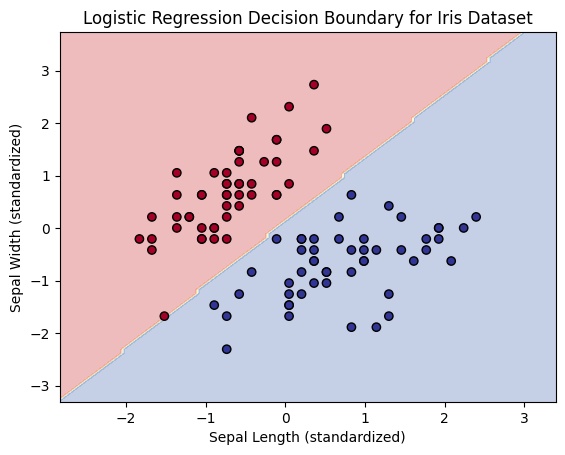

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Take first two features (sepal length & sepal width)
y = iris.target

# Only consider two classes for binary classification (to visualize decision boundary)
X = X[y != 2]
y = y[y != 2]

# Standardize features (improves model performance)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X, y)

# Create a mesh grid for the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# Predict on the grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k", cmap=plt.cm.RdYlBu)
plt.xlabel("Sepal Length (standardized)")
plt.ylabel("Sepal Width (standardized)")
plt.title("Logistic Regression Decision Boundary for Iris Dataset")
plt.show()


Model Accuracy: 0.7933


c:\Users\gaurav gupta\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


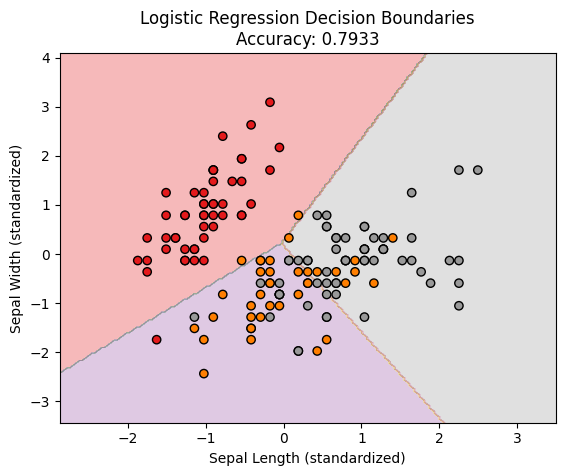

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Take first two features (sepal length & sepal width)
y = iris.target  # Three classes: 0 (setosa), 1 (versicolor), 2 (virginica)

# Standardize features for better performance
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train a Logistic Regression model for multi-class classification
model = LogisticRegression(multi_class="ovr", solver="liblinear")
model.fit(X, y)

# Predict class labels for training data
y_pred = model.predict(X)

# Calculate accuracy
accuracy = accuracy_score(y, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Create a mesh grid for decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Predict class for each point in the grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Set1)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k", cmap=plt.cm.Set1)
plt.xlabel("Sepal Length (standardized)")
plt.ylabel("Sepal Width (standardized)")
plt.title(f"Logistic Regression Decision Boundaries\nAccuracy: {accuracy:.4f}")
plt.show()


In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the dataset
iris = datasets.load_iris()
X = iris.data  # Using all 4 features
y = iris.target  # Three classes: 0, 1, 2

# Train-test split (try different test sizes & random states)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Logistic Regression model
model = LogisticRegression(multi_class="ovr", solver="liblinear")  # or "lbfgs" for multinomial
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")


Model Accuracy: 0.9778


c:\Users\gaurav gupta\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
